## Business Context:
One of the leading woman clothing e-commerce companies would like to analyse the customer’s
behaviour by analysing customer’s demographics and reviews submitted on the website.

## Business Objectives:
### Our main objectives are as follows.
#### a. Performing exploratory analysis on the data to understand the patterns
#### b. Perform text mining tasks to understand what most frequent words are using for positive sentiment and negative sentiment. Create word clouds for the positive & negative reviews separately.
#### c. Understand sentiment among the customers on the different categories, sub categories, products by location and age group
#### d. Perform predictive analytics to understand the drivers of customers who are recommending the products.
#### e. Create topics and understand themes behind the topics by performing topic mining.

In [2]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Importing Dataset

df = pd.read_excel('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/ML/15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform/Womens Clothing Reviews Data.xlsx')
df

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [4]:
## Renaming columns

df.columns = ['prod_ID', 'cat', 'sub_cat_1', 'sub_cat_2', 'location',
       'channel', 'cust_age', 'review_title', 'review_text', 'rating',
       'rec_flag']

In [5]:
df.head()

,prod_ID,cat,sub_cat_1,sub_cat_2,location,channel,cust_age,review_title,review_text,rating,rec_flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


## Exploratory Data Analysis

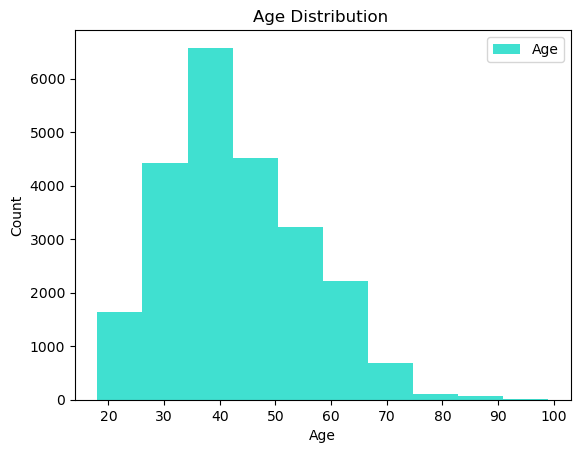

In [6]:
# Customer Age Distribution

plt.hist(df['cust_age'], color="turquoise", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution ")
plt.show()

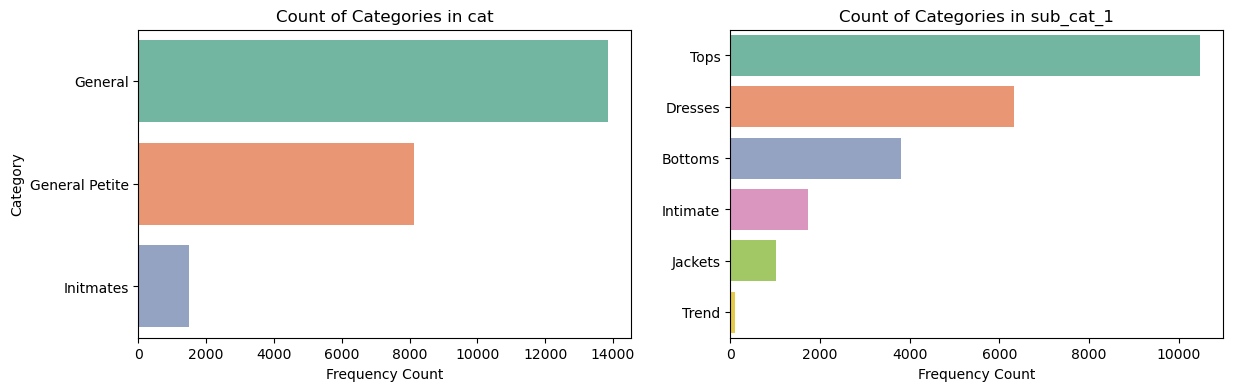

In [15]:
## Graph for count of labels in Category and Sub Category 1

div_dep = ['cat', 'sub_cat_1']
f, axes = plt.subplots(1, len(div_dep), figsize=(14, 4), sharex=False)

for i, x in enumerate(div_dep):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i], color="turquoise", palette="Set2")
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.show()

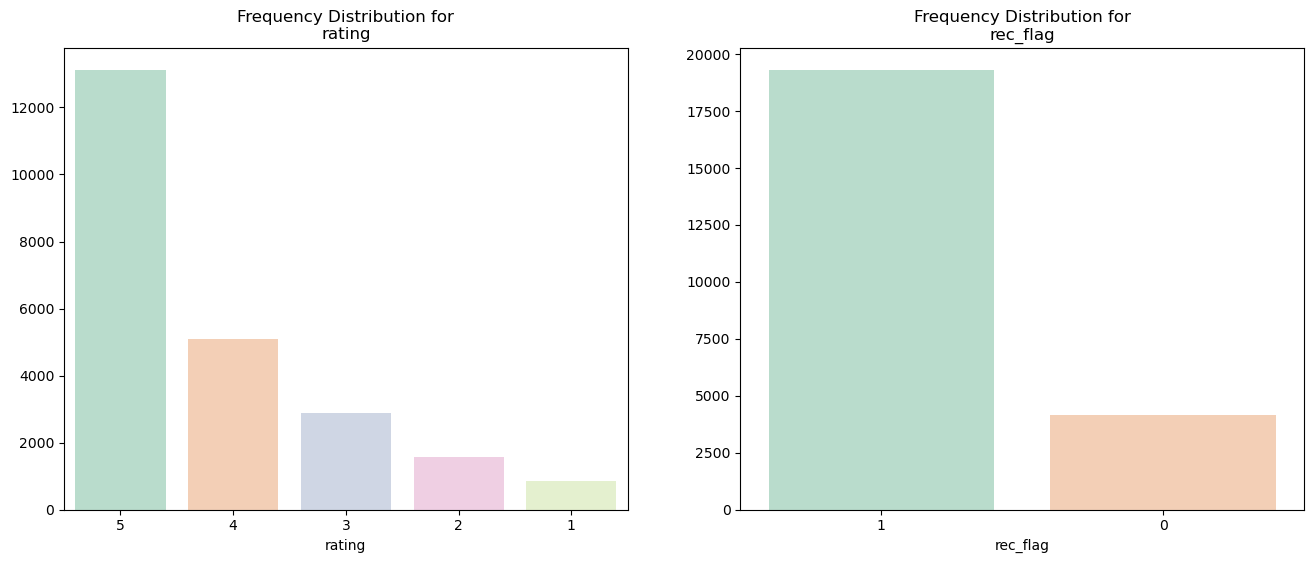

In [22]:
# Frequency Distribution for Rating and Recommendations

rat_rec = ['rating', 'rec_flag']
increment = 0
f, axes = plt.subplots(1, len(rat_rec), figsize=(16, 6), sharex=False)

for i in range(len(rat_rec)):
    sns.countplot(x=rat_rec[increment], data=df, order=df[rat_rec[increment]].value_counts().index, ax=axes[i], color="turquoise", palette="Pastel2")
    axes[i].set_title('Frequency Distribution for\n{}'.format(rat_rec[increment]))
    axes[i].set_ylabel('Occurrence')
    axes[i].set_xlabel('{}'.format(rat_rec[increment]))
    increment += 1
axes[0].set_ylabel('')
axes[1].set_ylabel('')
plt.show()

## Text Processing

In [18]:
# Removing Special Characters

import re
def sentence_rge(data):
    data = re.sub('<[^>]*>','',str(data))
    data = re.sub('[\W]+',' ',data.lower())
    return data

review_reg_clean = df['review_text'].apply(sentence_rge)

# Removing Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

df['review_clean'] = review_reg_clean.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


[nltk_data] Downloading package stopwords to /Users/abc/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0              absolutely wonderful silky sexy comfortable
1        love dress s sooo pretty happened find store m...
2        high hopes dress really wanted work initially ...
3        love love love jumpsuit s fun flirty fabulous ...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price s easy slip flatt...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never worked m glad able try ...
23484    bought dress wedding summer s cute unfortunate...
23485    dress lovely platinum feminine fits perfectly ...
Name: review_clean, Length: 23486, dtype: object

In [19]:
df

,prod_ID,cat,sub_cat_1,sub_cat_2,location,channel,cust_age,review_title,review_text,rating,rec_flag,review_clean
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky sexy comfortable
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,love dress s sooo pretty happened find store m...
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,high hopes dress really wanted work initially ...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love jumpsuit s fun flirty fabulous ...
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,shirt flattering due adjustable front tie perf...
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,happy snag dress great price s easy slip flatt...
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,reminds maternity clothes soft stretchy shiny ...
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,fit well top see never worked m glad able try ...
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,bought dress wedding summer s cute unfortunate...


<Axes: xlabel='rating'>

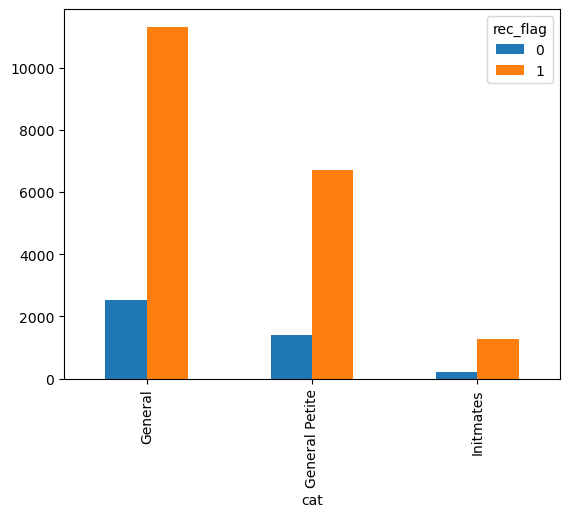

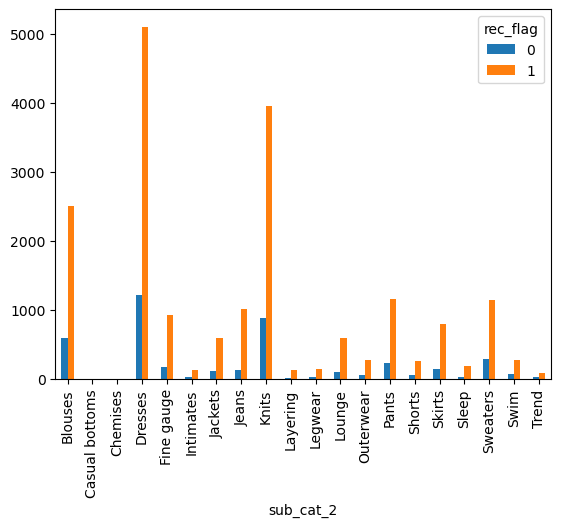

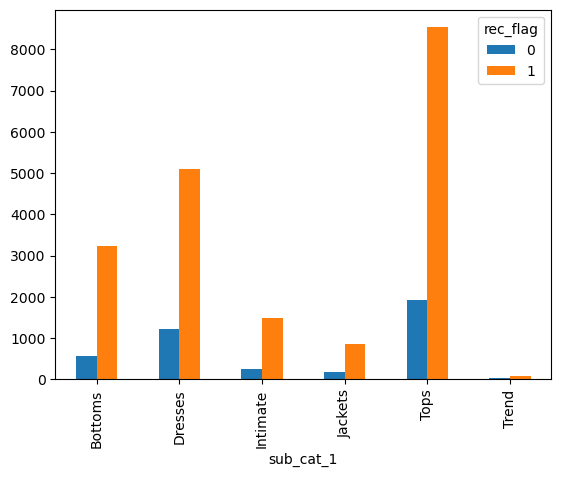

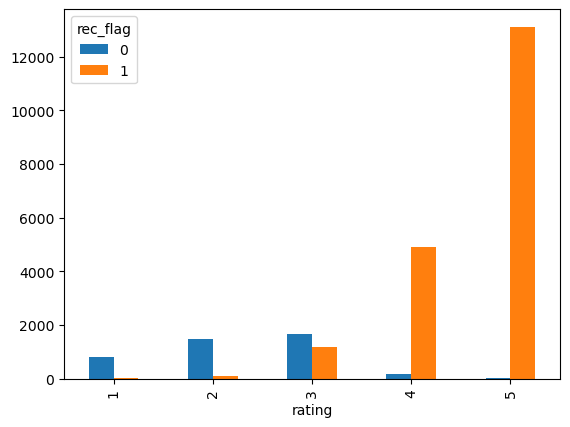

In [26]:
# Graph of frequecy of category, Sub-Cat 1, Sub Cat 2 and Rating for Recommendation Flag 1 and 0

df.groupby(['cat','rec_flag'])['prod_ID'].count().unstack('rec_flag').plot.bar()
df.groupby(['sub_cat_2','rec_flag'])['prod_ID'].count().unstack('rec_flag').plot.bar()
df.groupby(['sub_cat_1','rec_flag'])['prod_ID'].count().unstack('rec_flag').plot.bar()
df.groupby(['rating','rec_flag'])['prod_ID'].count().unstack('rec_flag').plot.bar()

## Sentiment Analysis

In [29]:
## Importing VADER from NLTK for Sentiment Analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/abc/nltk_data...


True

In [30]:
vader = SentimentIntensityAnalyzer()

In [36]:
# Applying Model, Variable Creation
df['pol_score'] = df['review_clean'].apply(lambda x: vader.polarity_scores(x)['compound'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['sentiment'] = ''
df.loc[df['pol_score'] >= 0.05, 'sentiment'] = 'Positive'
df.loc[(df['pol_score'] < 0.05) & (df['pol_score'] > -0.05), 'sentiment'] = 'Neutral'
df.loc[df['pol_score'] <= -0.05, 'sentiment'] = 'Negative'

### Normalize Plots for Sentiment Distribution

In [38]:
## Defining Function to ormalize barplot for reccomendation flag and sentiment analysis

def percentstandardize_barplot(x, y, hue, data, ax=None, order=None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x=x, y=y, hue=hue, ax=ax, order=order, color="turquoise",
                data=(data[[x, hue]]
                      .reset_index(drop=True)
                      .groupby([x])[hue]
                      .value_counts(normalize=True)
                      .rename('Percentage').mul(100)
                      .reset_index()
                      .sort_values(hue)))
    plt.title('Percentage Frequency of {} by {}'.format(hue, x))
    plt.ylabel('Percentage %')

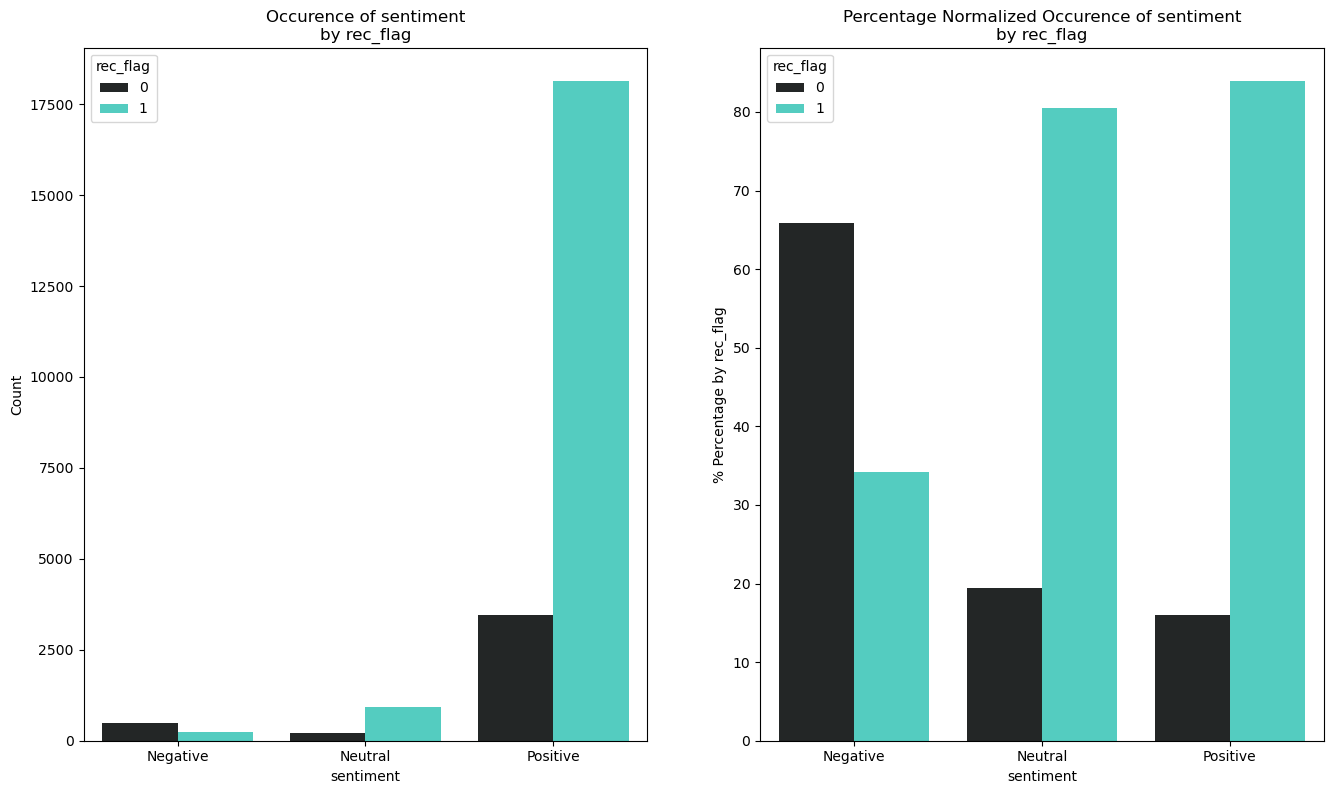

In [40]:
## Sentiment Analysis by Recommendation Flag

huevar = 'rec_flag'
xvar = 'sentiment'
f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=['Negative', 'Neutral', 'Positive'], color="turquoise")
axes[0].set_title('Occurence of {}\nby {}'.format(xvar, huevar))
axes[0].set_ylabel('Count')
percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=df, ax=axes[1], )
axes[1].set_title('Percentage Normalized Occurence of {}\nby {}'.format(xvar, huevar))
axes[1].set_ylabel('% Percentage by {}'.format(huevar))
plt.savefig('norm-sentimentdist.png', format='png', dpi=300)
plt.show()

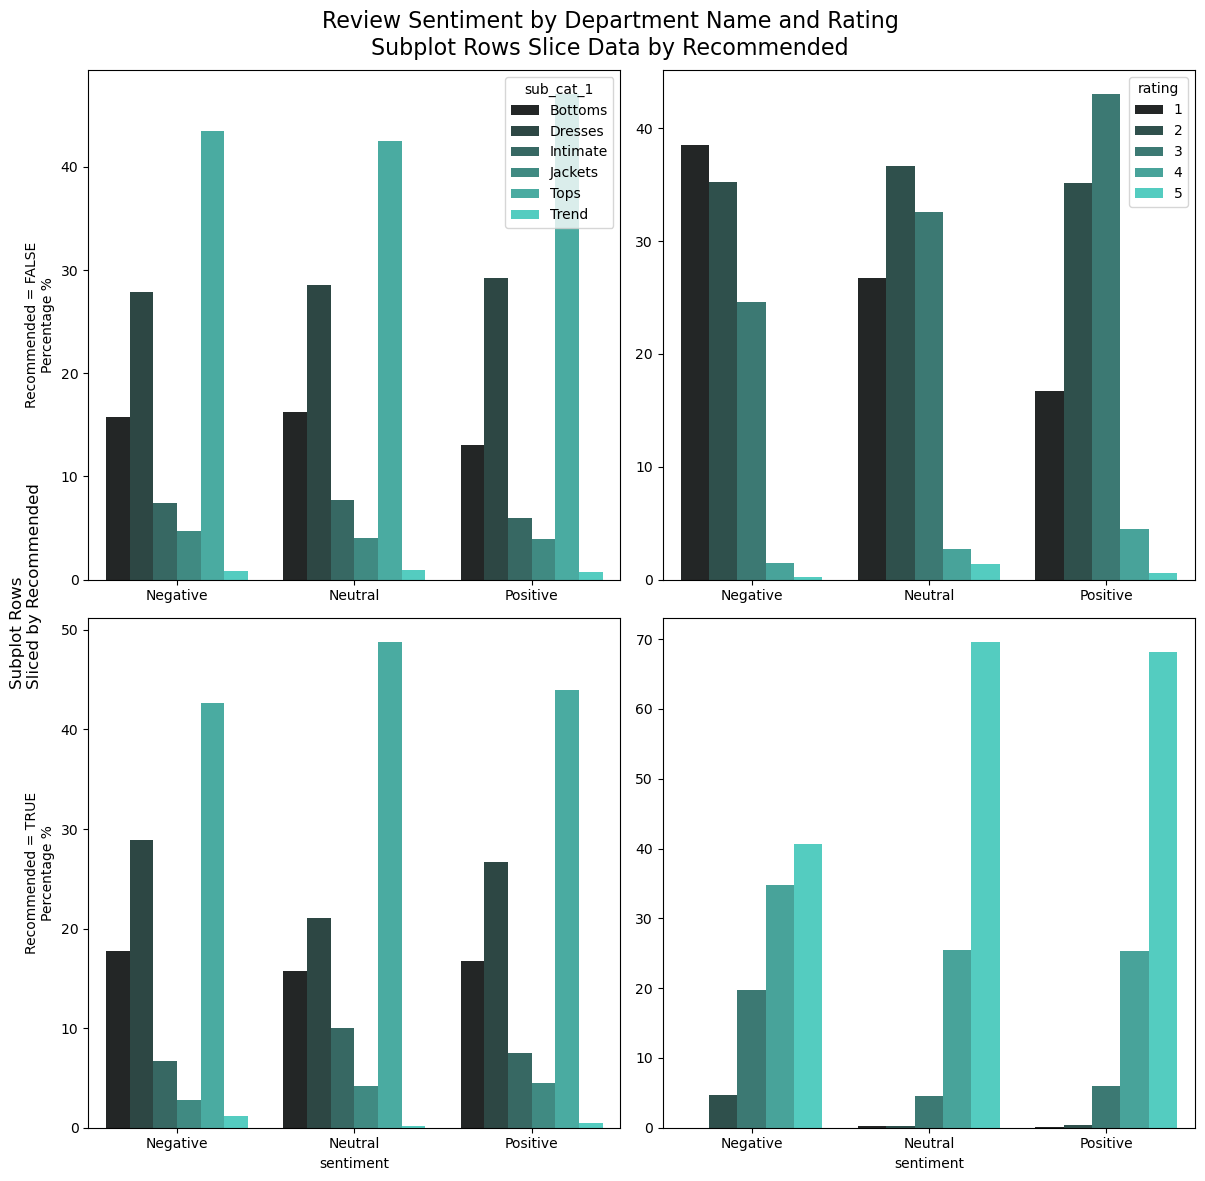

In [42]:
## Graph for Sentiment Analysis by SUb Category 1 and Rating sliced by Recommendation Flag

xvar = 'sentiment'
huevar = 'sub_cat_1'
rowvar = 'rec_flag'

# Plot
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False, sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=df[df[rowvar] == x],
                               ax=axes[i,0], order=['Negative','Neutral','Positive'])
    percentstandardize_barplot(x=xvar, y='Percentage', hue='rating', data=df[df[rowvar] == x],
                               ax=axes[i,1], order=['Negative','Neutral','Positive'])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,0].set_ylabel('Recommended = FALSE\nPercentage %')
axes[1,0].set_ylabel('Recommended = TRUE\nPercentage %')
axes[1,1].set_title('')

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle('Review Sentiment by Department Name and Rating\nSubplot Rows Slice Data by Recommended', fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.savefig('sentiment-deptname-rating-recommended.png', format='png', dpi=300)
plt.show()

<Axes: xlabel='sentiment', ylabel='age_group'>

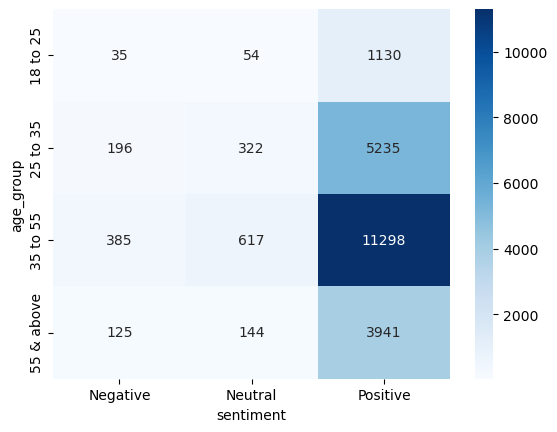

In [62]:
## Heatmap for Sentiment Analysis by Age Group

df['age_group'] = pd.cut(df.cust_age, bins=[18,25,35,55,df.cust_age.max()], 
                         labels=['18 to 25','25 to 35','35 to 55','55 & above'])

age_sent = pd.crosstab(df['age_group'],df['sentiment'])

sns.heatmap(age_sent, cmap='Blues', annot=True, fmt='g', xticklabels=True)

<Axes: xlabel='sentiment', ylabel='location'>

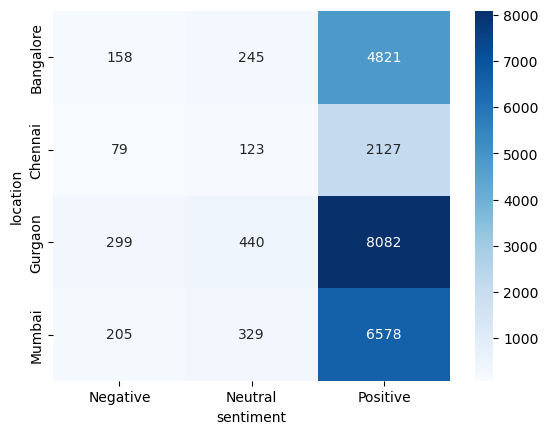

In [63]:
## Heatmap for Sentiment Analysis by Location

sns.heatmap(pd.crosstab(df['location'],df['sentiment']), cmap='Blues', annot=True, fmt='g', xticklabels=True)

<Axes: xlabel='sentiment', ylabel='channel'>

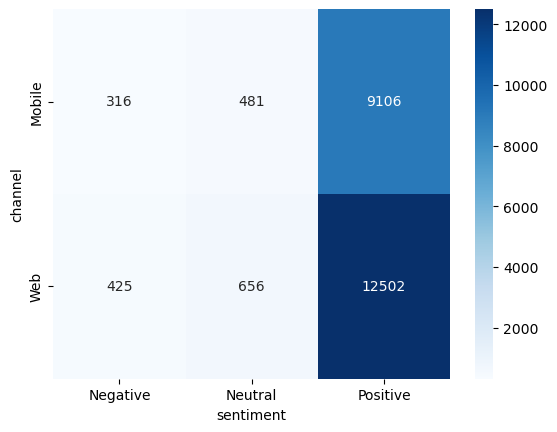

In [64]:
## Heatmap for Sentiment Analysis by Channel

sns.heatmap(pd.crosstab(df['channel'],df['sentiment']), cmap='Blues', annot=True, fmt='g', xticklabels=True)

### Wordclouds

In [43]:
# Importing Library for WordCloud
from wordcloud import WordCloud

In [74]:
stopwords.update(['nan', 'dress', 'shirt', 's', 'm', 'top', 'color', 'bought', 'look', 'ordered'])

WordCloud for Reviews with Positive Sentiments


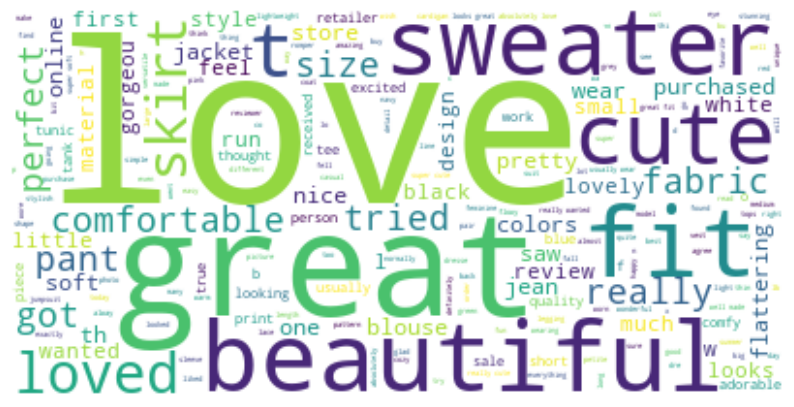

In [75]:
## WordCloud for Reviews with Positive Sentiments

Positive_Data = df[df["sentiment"] == 'Positive']
Positive_Data = Positive_Data["review_text"].to_string()

print("WordCloud for Reviews with Positive Sentiments")
Wordcloud_P = WordCloud(stopwords=stopwords, background_color='white').generate(Positive_Data)
plt.figure(figsize=(10,10))
plt.imshow(Wordcloud_P, interpolation='bilinear')
plt.axis("off")
plt.show()

WordCloud for Reviews with Negative Sentiments


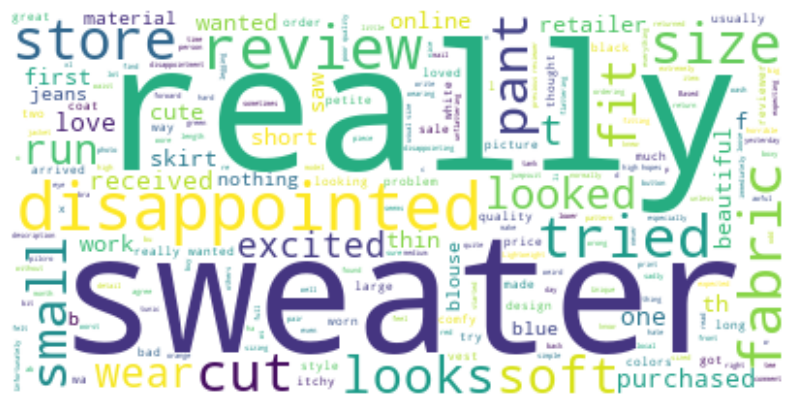

In [76]:
## WordCloud for Reviews with Negative Sentiments

Negative_Data = df[df["sentiment"] == 'Negative']
Negative_Data = Negative_Data["review_text"].to_string()

print("WordCloud for Reviews with Negative Sentiments")
Wordcloud_P = WordCloud(stopwords=stopwords, background_color='white').generate(Negative_Data)
plt.figure(figsize=(10,10))
plt.imshow(Wordcloud_P, interpolation='bilinear')
plt.axis("off")
plt.show()

WordCloud for Reviews with Neutral Sentiments


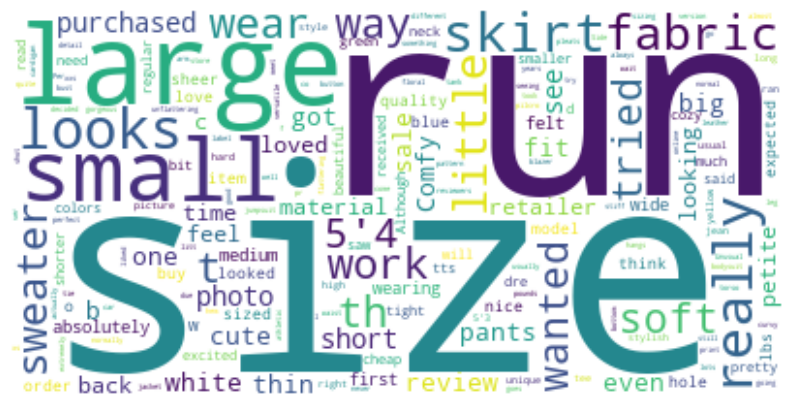

In [77]:
## WordCloud for Reviews with Neutral Sentiments

Neutral_Data = df[df["sentiment"] == 'Neutral']
Neutral_Data = Neutral_Data["review_text"].to_string()

print("WordCloud for Reviews with Neutral Sentiments")
Wordcloud_P = WordCloud(stopwords=stopwords, background_color='white').generate(Neutral_Data)
plt.figure(figsize=(10,10))
plt.imshow(Wordcloud_P, interpolation='bilinear')
plt.axis("off")
plt.show()

## Predictive Analysis
### Classification Model to Predict Recommendation Based on Review

In [78]:
## Vectorizing using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [79]:
# Train-Test Split 

from sklearn.model_selection import train_test_split

X = df.review_clean
y = df.rec_flag

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
## Vectorizing Training Data
X_train_vec = tfidf.fit_transform(X_train)

In [89]:
## Using Logistic Regression for Classification

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg_fit = log_reg.fit(X_train_vec,y_train)

In [90]:
# Taking Predictions for Training Data and Test Data

X_test_vec = tfidf.transform(X_test)

preds_log_train = log_reg_fit.predict(X_train_vec)
preds_log_test = log_reg_fit.predict(X_test_vec)

In [151]:
# Importing Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

In [92]:
# ROC-AUC Score on Training Data and Test Data

print('ROC-AUC Score on Training :',roc_auc_score(preds_log_train, y_train))
print('ROC-AUC Score on Testing :',roc_auc_score(preds_log_test, y_test))

ROC-AUC Score on Training : 0.8921653737553319
ROC-AUC Score on Testing : 0.8501163528665115


### Classification Model to Predict Rating Based on Review

In [94]:
## Train Test Split for new Target variable using same random state

y_rat = df.rating
y_train, y_test = train_test_split(y_rat, test_size=0.25, random_state=42)

In [106]:
## Using Decision Tree Classifier for Rating Classification

from sklearn.ensemble import RandomForestClassifier

In [147]:
dt_clf = RandomForestClassifier(min_samples_split = 8, min_samples_leaf=3, criterion='entropy')
dt_clf_fit = dt_clf.fit(X_train_vec, y_train)

In [148]:
# Taking Predictions for Training Data and Test Data

preds_dt_train = dt_clf_fit.predict(X_train_vec)
preds_dt_test = dt_clf_fit.predict(X_test_vec)

In [149]:
# Precision Score and Recall Score on Training Data and Test Data

print('Precision Score on Training :',precision_score(preds_dt_train, y_train, average='weighted'))
print('Precision Score on Testing :',precision_score(preds_dt_test, y_test, average='weighted'))
print('F1 Score on Training :',f1_score(preds_dt_train, y_train, average='weighted'))
print('F1 Score on Testing :',f1_score(preds_dt_test, y_test, average='weighted'))

Precision Score on Training : 0.9355267387256808
Precision Score on Testing : 0.9785063409018994
F1 Score on Training : 0.7210993215974474
F1 Score on Testing : 0.70782781410095
